In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.shape

(918, 12)

In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
data[(data['RestingBP'] >= 0) & (data['RestingBP'] < 80)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [7]:
((data['Cholesterol'] >= 0) & (data['Cholesterol'] < 20)).sum()

172

Сразу заменим некоторые выбросы, например, resting blood pressure не может быть 0, будем иметь это в виду.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Замечаем, что в датасете нет пропусков, значит над этим нам не придется работать и датасет заполнен полностью.

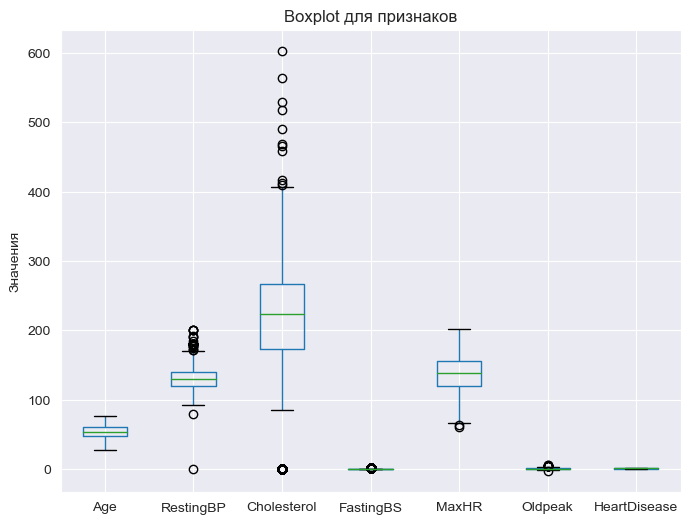

In [10]:
plt.figure(figsize=(8, 6))
data.boxplot()
plt.title('Boxplot для признаков')
plt.ylabel('Значения')
plt.show()

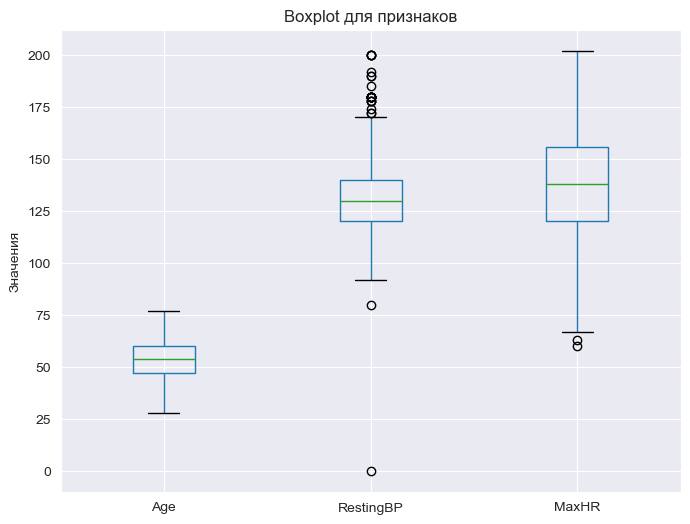

In [11]:
plt.figure(figsize=(8, 6))
data.boxplot(column=['Age', 'RestingBP', 'MaxHR'])
plt.title('Boxplot для признаков')
plt.ylabel('Значения')
# plt.ylim(-3,20)
plt.show()

In [12]:
numeric_features = data.columns

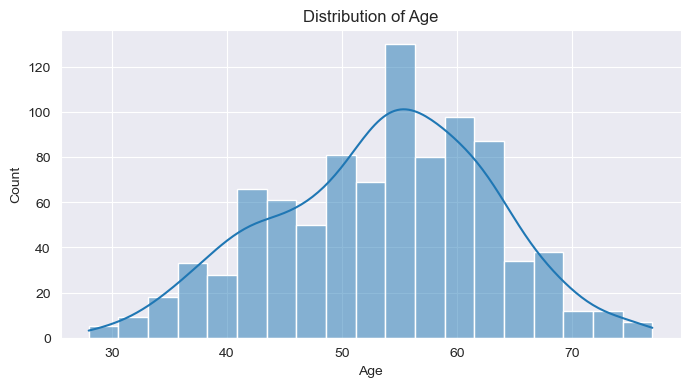

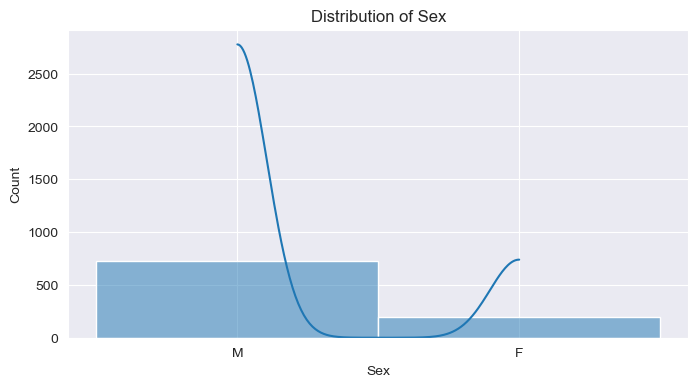

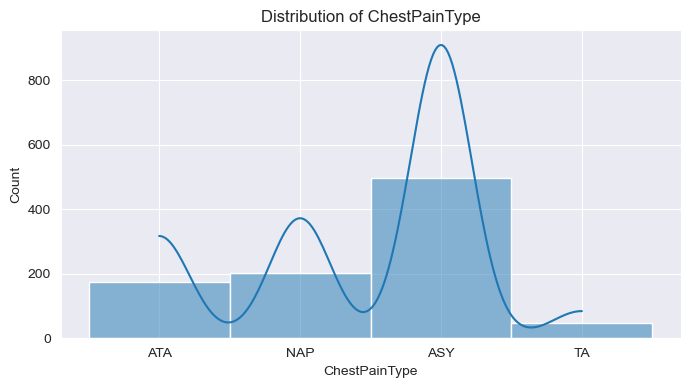

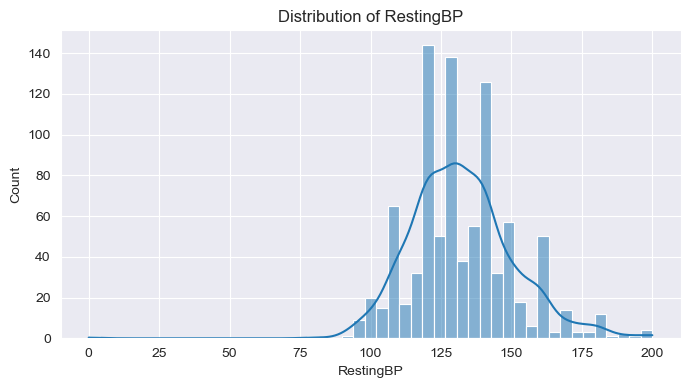

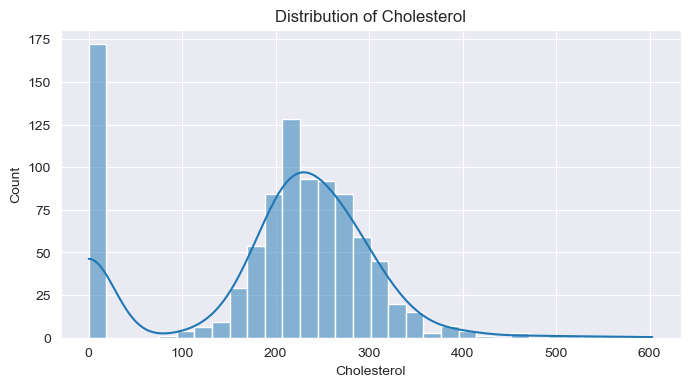

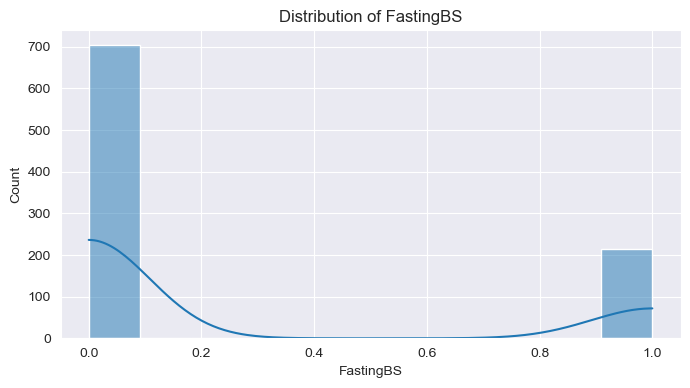

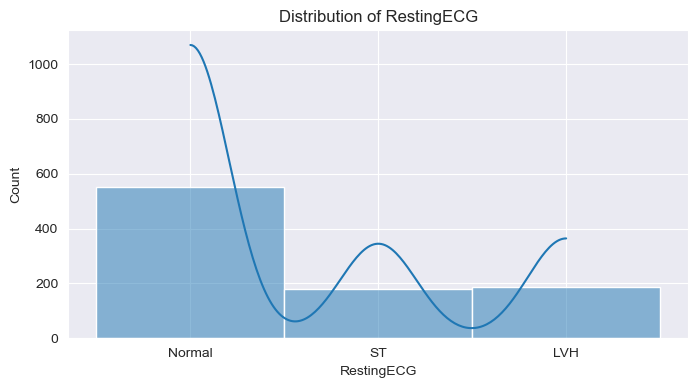

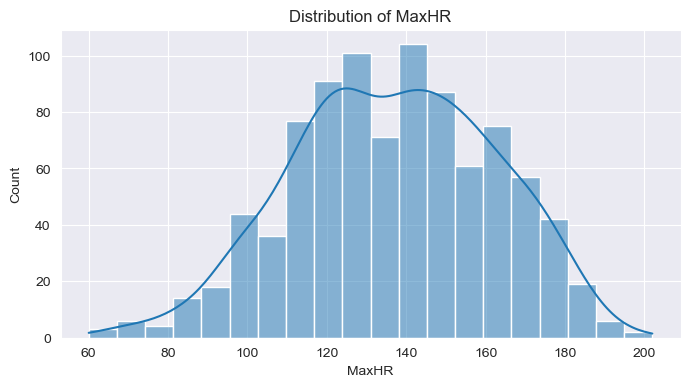

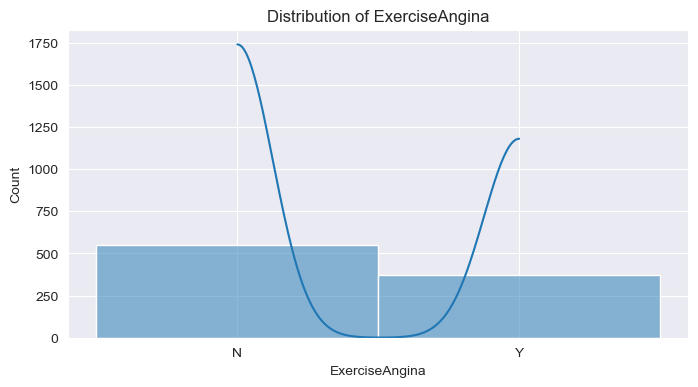

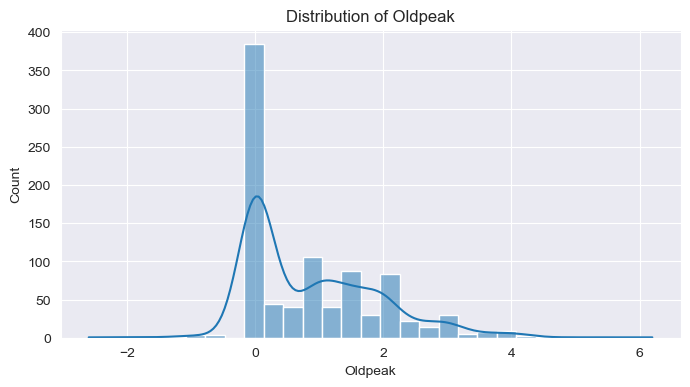

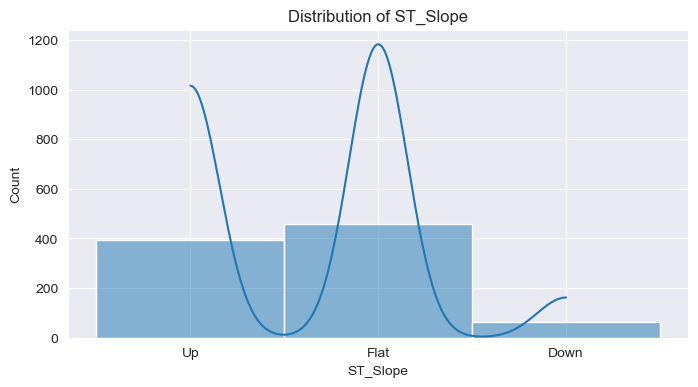

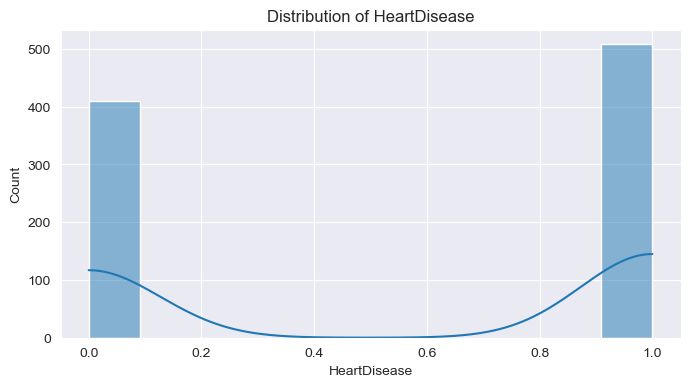

In [13]:
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

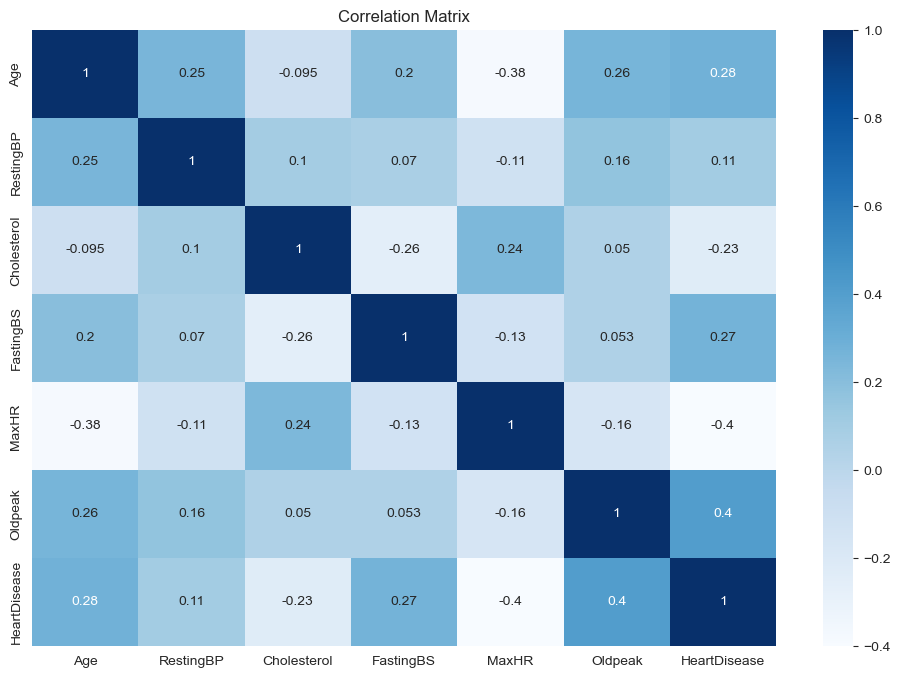

In [14]:
# Корреляционная матрица и тепловая карта
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [15]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


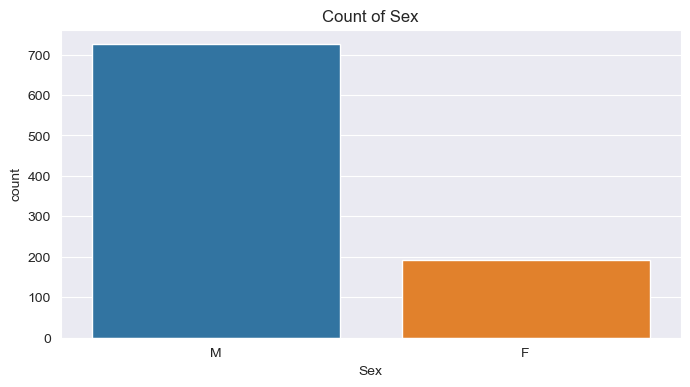

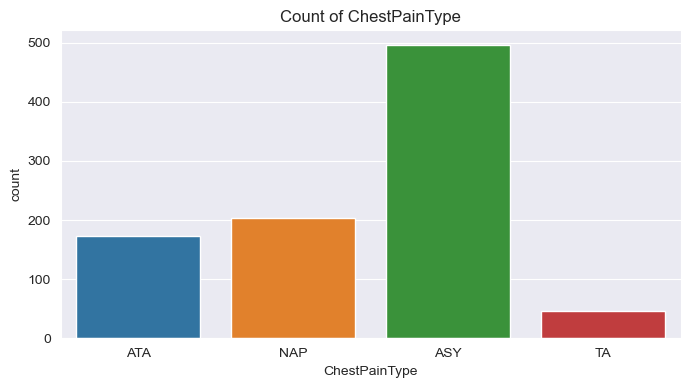

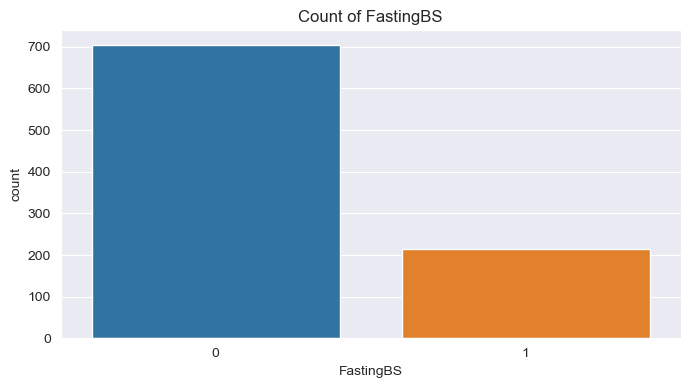

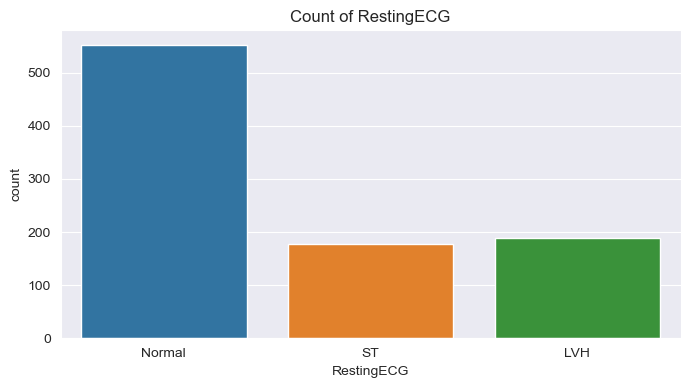

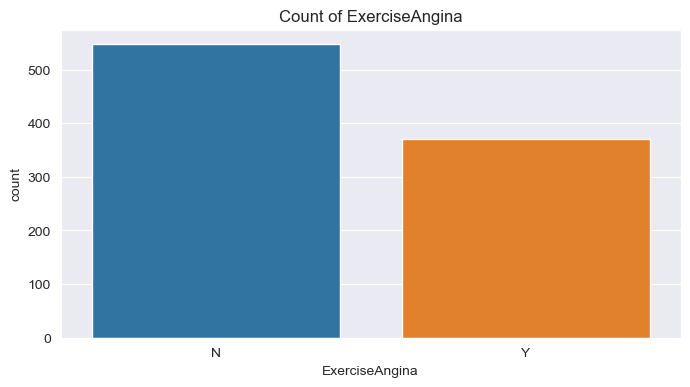

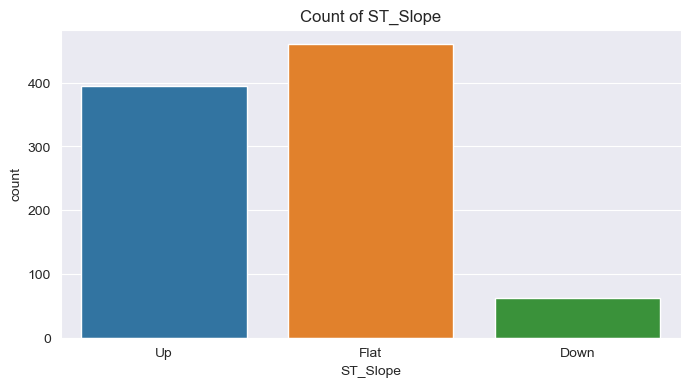

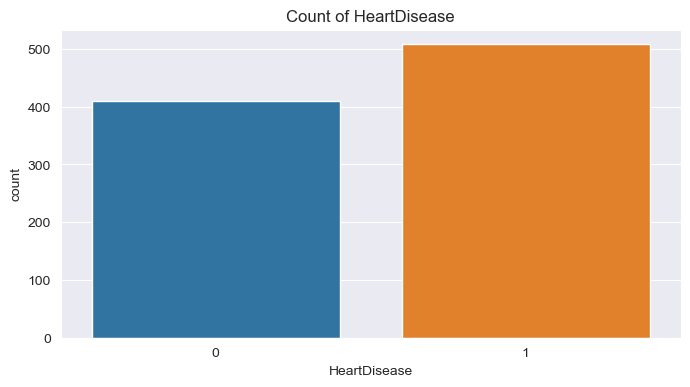

In [16]:
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=feature)
    plt.title(f'Count of {feature}')
    plt.show()

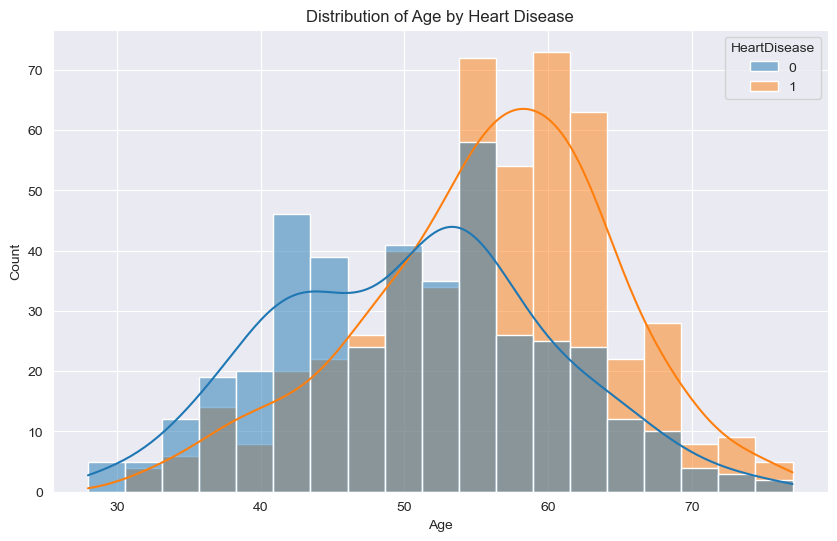

In [17]:
# распределение возрастов в зависимости от наличия заболевания сердца
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='HeartDisease', kde=True)
plt.title('Distribution of Age by Heart Disease')
plt.show()

In [18]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

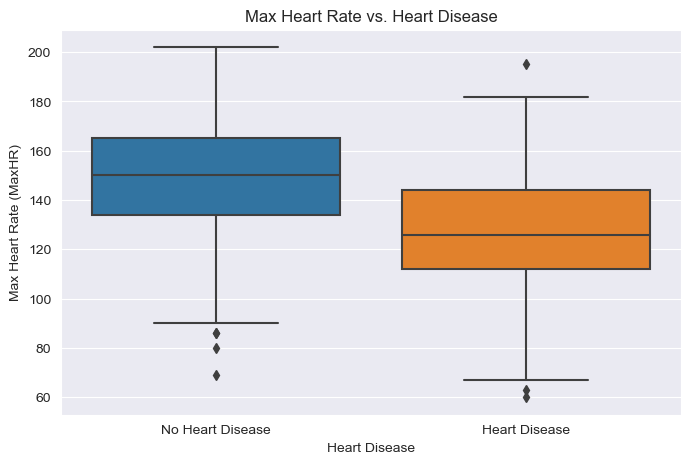

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='HeartDisease', y='MaxHR')
plt.title('Max Heart Rate vs. Heart Disease')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.xlabel('Heart Disease')
plt.ylabel('Max Heart Rate (MaxHR)')
plt.show()


Заметим зависимость, что распределения максимальной частоты сердечных сокращений (MaxHR) у пациентов с наличием заболевания в среднем ниже, чем у здоровых пациентов

In [20]:
X = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [21]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [22]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [24]:
y = X['HeartDisease']
X = X.drop('HeartDisease', axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree без настройки параметров 

In [26]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
y_pred_decision_tree = model_dt.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred_decision_tree)

0.7989130434782609

In [29]:
print(classification_report(y_test, y_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        77
           1       0.86      0.78      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184


### Random Forest без натройки параметров

In [30]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred_random_forest = model_rf.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred_random_forest)

0.8804347826086957

In [33]:
print(classification_report(y_test, y_pred_random_forest))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184


In [34]:
feature_importances = model_rf.feature_importances_

In [35]:
feature_importances

array([0.08038236, 0.06308213, 0.09622504, 0.01917205, 0.08992261,
       0.11327358, 0.024723  , 0.01845063, 0.05301906, 0.01303859,
       0.01305943, 0.00554729, 0.01250942, 0.01070849, 0.00844074,
       0.07265614, 0.06532936, 0.00630752, 0.08320411, 0.15094844])

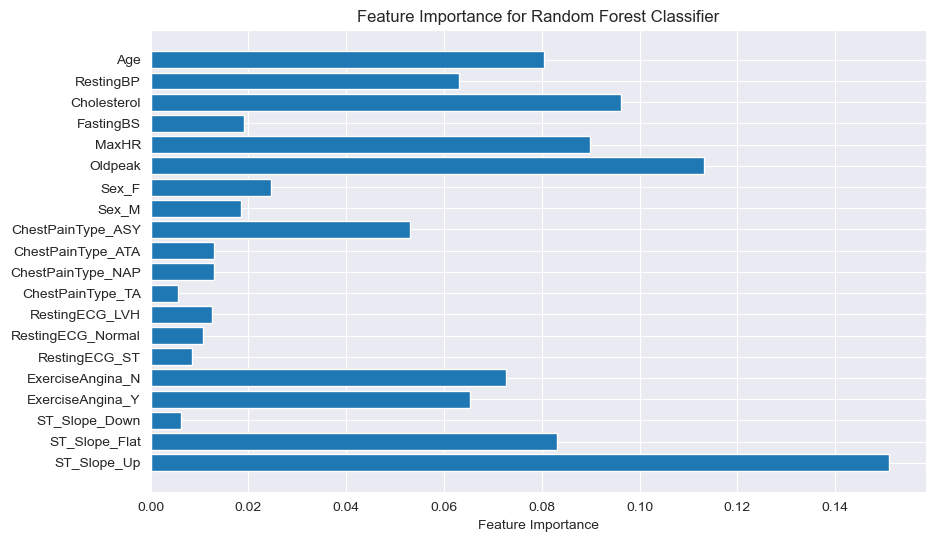

In [36]:
# Создание столбчатой диаграммы для важности признаков
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), X.columns)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Classifier')
plt.gca().invert_yaxis()  # Перевернуть ось y для лучшей читаемости
plt.show()

In [37]:
imp = pd.Series(model_rf.feature_importances_)
imp.index = pd.Series(X_train.columns)
imp.index = pd.Series(X_train.columns)
imp = imp.sort_values(ascending=False)
imp

ST_Slope_Up          0.150948
Oldpeak              0.113274
Cholesterol          0.096225
MaxHR                0.089923
ST_Slope_Flat        0.083204
Age                  0.080382
ExerciseAngina_N     0.072656
ExerciseAngina_Y     0.065329
RestingBP            0.063082
ChestPainType_ASY    0.053019
Sex_F                0.024723
FastingBS            0.019172
Sex_M                0.018451
ChestPainType_NAP    0.013059
ChestPainType_ATA    0.013039
RestingECG_LVH       0.012509
RestingECG_Normal    0.010708
RestingECG_ST        0.008441
ST_Slope_Down        0.006308
ChestPainType_TA     0.005547
dtype: float64

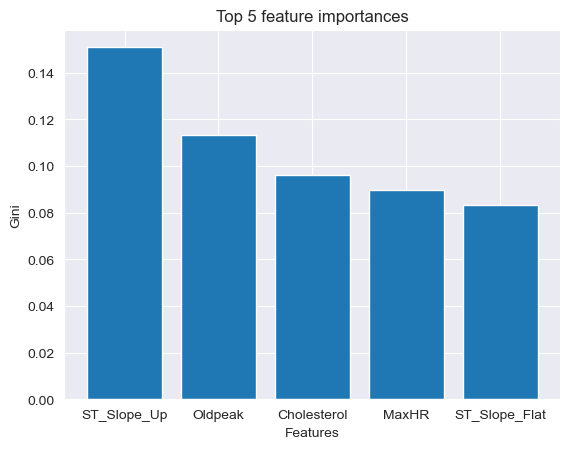

In [38]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.head(5).index, imp.head(5)) # можно менять количество выводимых фич
plt.show()

#### Реализация OneHotEncoding с помощью sklearn.preprocessing

In [39]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

In [40]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [41]:
data_encoded = data
for col in categorical_columns:
    print(col)
    encoded_col = encoder.fit_transform(data[[col]])
    encoded_df = pd.DataFrame(encoded_col, columns=encoder.get_feature_names_out([col]))
    data_encoded = pd.concat([data_encoded, encoded_df], axis=1)
    data_encoded.drop(col, axis=1, inplace=True)

Sex
ChestPainType
RestingECG
ExerciseAngina
ST_Slope


In [42]:
data_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [43]:
y_data = data_encoded['HeartDisease']
X_data = data_encoded.drop(columns=['HeartDisease'])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [45]:
model_rf_data = RandomForestClassifier(random_state=42)

In [46]:
model_rf_data.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_pred_fr_data = model_rf_data.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred_fr_data)

0.8804347826086957

In [49]:
X_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,1,141,3.4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,0,115,1.2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,130,236,0,174,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [50]:
print(classification_report(y_test, y_pred_fr_data))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184


Получаем те же значения, что и с помощью get_dummies

### Реализация Label encoding с помощью sklearn.preprocessing

In [51]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [52]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
data_label = data

for col in categorical_columns:
    data_label[col] = label_encoder.fit_transform(data_label[col])

In [53]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [54]:
y_data = data_label['HeartDisease']
X_data = data_label.drop(columns=['HeartDisease'])
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [55]:
model_rf_label = RandomForestClassifier(random_state=42)

In [56]:
model_rf_label.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
y_pred_fr_label = model_rf_label.predict(X_test)

In [58]:
accuracy_score(y_test, y_pred_fr_label)

0.8804347826086957

In [59]:
print(classification_report(y_test, y_pred_fr_label))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184


### Bagging

In [60]:
from sklearn.ensemble import BaggingClassifier

In [61]:
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), 
                                  n_estimators=100, 
                                  random_state=42,
                                  max_samples=1.0, 
                                  max_features=1.0, 
                                  bootstrap=True,)

In [62]:
bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [63]:
y_pred_bagging = bagging_model.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred_bagging)

0.8858695652173914

In [65]:
print(classification_report(y_test, y_pred_bagging))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        77
           1       0.92      0.88      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184


### Stacking

In [66]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeCV

In [67]:
model_svc = LinearSVC(random_state=42)

In [68]:
estimators = [('decision_tree', model_dt), ('random_forest', model_rf), ('linear_svc', model_svc)]

In [69]:
stacking_model = StackingClassifier(estimators=estimators,
                                    final_estimator=RandomForestClassifier(random_state=42))

In [70]:
stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('decision_tree',
                                DecisionTreeClassifier(random_state=42)),
                               ('random_forest',
                                RandomForestClassifier(random_state=42)),
                               ('linear_svc', LinearSVC(random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=42))

In [71]:
y_pred_stacking = stacking_model.predict(X_test)

In [72]:
accuracy_score(y_test, y_pred_stacking)

0.8695652173913043

In [73]:
print(classification_report(y_test, y_pred_stacking))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        77
           1       0.91      0.86      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184


In [74]:
for i in stacking_model.named_estimators:
    print(f'Score on train  with model: {i} - {stacking_model.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test  with model: {i} -  {stacking_model.named_estimators_[i].score(X_test, y_test)}')

Score on train  with model: decision_tree - 1.0
Score on test  with model: decision_tree -  0.782608695652174
Score on train  with model: random_forest - 1.0
Score on test  with model: random_forest -  0.8804347826086957
Score on train  with model: linear_svc - 0.614441416893733
Score on test  with model: linear_svc -  0.5869565217391305


the same 

In [75]:
Regressor = StackingClassifier(
    [ ('DecisionTree', DecisionTreeClassifier(random_state=42)),
      ('RandomForestClassifier', RandomForestClassifier(random_state=42)),
      ('LinearSVC', LinearSVC(random_state=42))
    ])


In [76]:
Regressor.fit(X_train, y_train)
print(f'Score on train  {Regressor.score(X_train, y_train)}')
print(f'Score on test  {Regressor.score(X_test, y_test)}')

Score on train  0.94141689373297
Score on test  0.8097826086956522


In [77]:
for i in Regressor.named_estimators:
    print(f'Score on train  with model: {i} - {Regressor.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test  with model: {i} -  {Regressor.named_estimators_[i].score(X_test, y_test)}')

Score on train  with model: DecisionTree - 1.0
Score on test  with model: DecisionTree -  0.782608695652174
Score on train  with model: RandomForestClassifier - 1.0
Score on test  with model: RandomForestClassifier -  0.8804347826086957
Score on train  with model: LinearSVC - 0.614441416893733
Score on test  with model: LinearSVC -  0.5869565217391305


end of the same code

### Выводы:

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Decision Tree': model_dt,
    'Random Forest': model_rf,
    'Linear SVC': model_svc,
    'Bagging (Decision Tree)': bagging_model,
    'Stacking Classifier': stacking_model
}

metrics_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metrics_df.loc[model_name] = [accuracy, precision, recall, f1]

print(metrics_df)


                         Accuracy  Precision    Recall  F1 Score
Decision Tree            0.782609   0.860215  0.747664  0.800000
Random Forest            0.880435   0.897196  0.897196  0.897196
Linear SVC               0.586957   0.969697  0.299065  0.457143
Bagging (Decision Tree)  0.885870   0.921569  0.878505  0.899522
Stacking Classifier      0.869565   0.910891  0.859813  0.884615


Для нас ложно отрицательные результаты (пропуск целевого класса) более критичны, то нам следует стремиться к повышению полноты (recall). В данном случае, важно минимизировать количество случаев, когда модель не обнаруживает сердечную недостаточность у пациентов, которые действительно нуждаются в медицинском вмешательстве.  
Таким образом, наилучший результат показывает Random forest. У него наивысшие показатели Recall and F1 score.   
Random forest включает в себя bagging и случайные подпространства (т.е. использование случайных признаков)